### Building a Chatbot with multiple Tools using LangGraph

In [1]:
from langchain_community.tools import ArxivQueryRun, WikipediaQueryRun
from langchain_community.utilities import ArxivAPIWrapper, WikipediaAPIWrapper

In [5]:
api_wraper_arxive = ArxivAPIWrapper(top_k_results=2, doc_content_chars_max=500)
arxive = ArxivQueryRun(api_wrapper=api_wraper_arxive)
print(arxive.name)

arxiv


In [4]:
print(arxive.run("What is the latest research on quantum computing?"))

Published: 2023-05-23
Title: Fast and energy-efficient non-volatile III-V-on-silicon photonic phase shifter based on memristors
Authors: Zhuoran Fang, Bassem Tossoun, Antoine Descos, Di Liang, Xue Huang, Geza Kurczveil, Arka Majumdar, Raymond G. Beausoleil
Summary: Silicon photonics has evolved from lab research to commercial products in the
past decade as it plays an increasingly crucial role in data communication for
next-generation data centers and high performance computing1. Recently,
progr


In [6]:
arxive.invoke("Attention is all you need")

"Published: 2024-07-22\nTitle: Attention Is All You Need But You Don't Need All Of It For Inference of Large Language Models\nAuthors: Georgy Tyukin, Gbetondji J-S Dovonon, Jean Kaddour, Pasquale Minervini\nSummary: The inference demand for LLMs has skyrocketed in recent months, and serving\nmodels with low latencies remains challenging due to the quadratic input length\ncomplexity of the attention layers. In this work, we investigate the effect of\ndropping MLP and attention layers at inference time o"

In [7]:
api_wraper_wiki = WikipediaAPIWrapper(top_k_results=1, doc_content_chars_max=500)
wiki = WikipediaQueryRun(api_wrapper=api_wraper_wiki)
print(wiki.name)

wikipedia


In [8]:
print(wiki.run("What is the latest research on quantum computing?"))

Page: Timeline of quantum computing and communication
Summary: This is a timeline of quantum computing and communication.


In [9]:
wiki.invoke("Attention is all you need")

'Page: Attention Is All You Need\nSummary: "Attention Is All You Need" is a 2017 landmark research paper in machine learning authored by eight scientists working at Google. The paper introduced a new deep learning architecture known as the transformer, based on the attention mechanism proposed in 2014 by Bahdanau et al. It is considered a foundational paper in modern artificial intelligence, and a main contributor to the AI boom, as the transformer approach has become the main architecture of a wi'

In [10]:
from dotenv import load_dotenv
import os

load_dotenv()

True

In [11]:
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")
os.environ["TAVILY_API_KEY"] = os.getenv("TAVILY_API_KEY")

In [12]:
from langchain_community.tools.tavily_search import TavilySearchResults

tavily = TavilySearchResults()

/var/folders/sh/gynb2lj96d7922pmjv2kbwjc0000gp/T/ipykernel_7099/735679136.py:3: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-tavily package and should be used instead. To use it run `pip install -U :class:`~langchain-tavily` and import as `from :class:`~langchain_tavily import TavilySearch``.
  tavily = TavilySearchResults()


In [13]:
tavily.invoke("What is the latest research on quantum computing?")

[{'title': 'Latest Advancements in Quantum Computing Technology',
  'url': 'https://quantaintelligence.ai/2024/10/12/technology/latest-advancements-in-quantum-computing-technology',
  'content': 'Global research teams are collaborating to enhance error correction techniques and extend coherence times—the duration qubits maintain their quantum state. In 2023, scientists at the University of Chicago achieved a milestone by extending qubit coherence times to over five seconds, a significant improvement that brings us closer to practical quantum computing. [...] Recent advancements include the development of more stable qubits that operate at higher temperatures, enhanced error correction techniques, and significant improvements in qubit coherence times, such as the five-second milestone achieved by researchers at the University of Chicago.\n\nHow are tech companies investing in quantum computing? [...] The quantum computing landscape is evolving rapidly, with key breakthroughs marking its

In [14]:
tavily.invoke("today new on AI developments and updates.")

[{'title': 'A Daily Chronicle of AI Innovations in July 2025 - AI - IT ...',
  'url': 'https://enoumen.com/2025/07/01/a-daily-chronicle-of-ai-innovations-in-july-2025/',
  'content': 'A Daily Chronicle of AI Innovations in July 2025. Welcome to "A Daily Chronicle of AI Innovations in July 2025"—your go-to source for the latest breakthroughs, trends, and updates in artificial intelligence. Each day, we\'ll bring you fresh insights into groundbreaking AI advancements, from cutting-edge research and new product launches to ethical debates and real-world applications.',
  'score': 0.6562404},
 {'title': 'Latest AI News (July 1, 2025) - OpenTools',
  'url': 'https://opentools.ai/news',
  'content': 'Latest AI News: July 1, 2025 Stay informed with our daily curated artificial intelligence news and insights. We bring you the most important updates in AI, machine learning, and emerging technologies.',
  'score': 0.6466616},
 {'title': 'Latest AI News:',
  'url': 'https://opentools.ai/news/11-a

In [15]:
### Tools

tools = [arxive, wiki, tavily]

In [16]:
## Initialize my LLM model

from langchain_groq import ChatGroq

llm=ChatGroq(model="qwen-qwq-32b")

llm_with_tools=llm.bind_tools(tools)

In [20]:
from langchain_core.messages import AIMessage, HumanMessage
llm_with_tools.invoke([HumanMessage(content=f"Recent news on US economy?")])

AIMessage(content='', additional_kwargs={'reasoning_content': 'Okay, the user is asking for recent news on the US economy. I need to figure out the best way to get that information. Let me look at the available tools. There\'s the arxiv function, but that\'s more for academic papers, right? Probably not the best for recent news. Wikipedia is for encyclopedic entries, so that\'s not实时 information either. The Tavily search results function seems like the way to go since it\'s a search engine that can provide current news. I should call Tavily with the query "recent news US economy" to get the latest updates. Let me make sure the parameters are correct. The function requires a query, so I\'ll format that properly in the tool call.\n', 'tool_calls': [{'id': 'ndjr353w1', 'function': {'arguments': '{"query":"recent news US economy"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 179, 'prompt_tokens': 268, 'total_tokens'

In [21]:
llm_with_tools.invoke([HumanMessage(content=f"Recent news on US economy?")]).tool_calls

[{'name': 'tavily_search_results_json',
  'args': {'query': 'US economy latest news updates'},
  'id': 'megq4n1cf',
  'type': 'tool_call'}]

In [22]:
### State Schema
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage
from typing import Annotated
from langgraph.graph.message import add_messages

In [23]:
class statclasss(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]

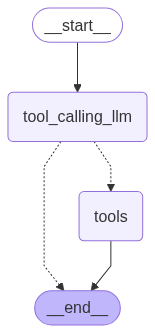

In [25]:
### Chatbot

from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode, tools_condition

### Defining node

def tool_calling_llm(stat:statclasss):
    return {"messages": [llm_with_tools.invoke(stat["messages"])]}

### Building the Graph
builder = StateGraph(statclasss)

builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode(tools))

builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges("tool_calling_llm", tools_condition)
builder.add_edge("tools", END)

graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))


In [26]:
messages=graph.invoke({"messages":HumanMessage(content="1706.03762")})
for m in messages['messages']:
    m.pretty_print()


================================ Human Message =================================

1706.03762
================================== Ai Message ==================================
Tool Calls:
  arxiv (yz1z0k3qq)
 Call ID: yz1z0k3qq
  Args:
    query: 1706.03762
================================= Tool Message =================================
Name: arxiv

Published: 2023-08-02
Title: Attention Is All You Need
Authors: Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob Uszkoreit, Llion Jones, Aidan N. Gomez, Lukasz Kaiser, Illia Polosukhin
Summary: The dominant sequence transduction models are based on complex recurrent or
convolutional neural networks in an encoder-decoder configuration. The best
performing models also connect the encoder and decoder through an attention
mechanism. We propose a new simple network architecture, the Transformer, base


In [27]:
messages=graph.invoke({"messages":HumanMessage(content="Provide me the top 10 recent AI news for MArch 3rd 2025")})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Provide me the top 10 recent AI news for MArch 3rd 2025
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (211ft69ha)
 Call ID: 211ft69ha
  Args:
    query: top 10 recent AI news articles from March 3rd 2025
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "March 2025-Breakthrough Models, and agentic AI - coglist.com", "url": "https://coglist.com/issue/ai-news-in-march-2025", "content": "March 2025: AI's Regulatory Surge, Breakthrough Models, and the Rise of Autonomous Agents March 2025 was a dynamic month for artificial intelligence, with significant developments ranging from regulatory efforts to technological breakthroughs. Below, we've compiled the top 10 AI news events, each backed by reliable sources for verification.", "score": 0.94475573}, {"title": "

In [28]:
messages=graph.invoke({"messages":HumanMessage(content="What is machine learning")})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

What is machine learning
================================== Ai Message ==================================
Tool Calls:
  wikipedia (kdag4jzav)
 Call ID: kdag4jzav
  Args:
    query: Machine learning
================================= Tool Message =================================
Name: wikipedia

Page: Machine learning
Summary: Machine learning (ML) is a field of study in artificial intelligence concerned with the development and study of statistical algorithms that can learn from data and generalise to unseen data, and thus perform tasks without explicit instructions. Within a subdiscipline in machine learning, advances in the field of deep learning have allowed neural networks, a class of statistical algorithms, to surpass many previous machine learning approaches in performance.
ML fi
